In [242]:
import pickle
from functools import partial
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns

In [243]:
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rcParams.update({'font.size': 30})
# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['text.usetex'] = False

In [244]:
r = {}
folder = '2000_plain_alpha_0.4'
with open(folder, 'rb') as f:
    r = pickle.load(f)

In [245]:
X = []
A = []
HPFA_TIME = []
USUAL_TIME = []
ERRORS = []

for name in r:
    res = r[name]
    X.append(res['X'])
    A.append(res['A'][0])
    HPFA_TIME.append(res['HPFA_TIME'][0])
    USUAL_TIME.append(res['USUAL_TIME'][0])
    ERRORS.append(res['ERRORS'][0])

In [246]:
X =np.array(X)
A =np.array(A)
HPFA_TIME =np.array(HPFA_TIME)
USUAL_TIME =np.array(USUAL_TIME)


0.0


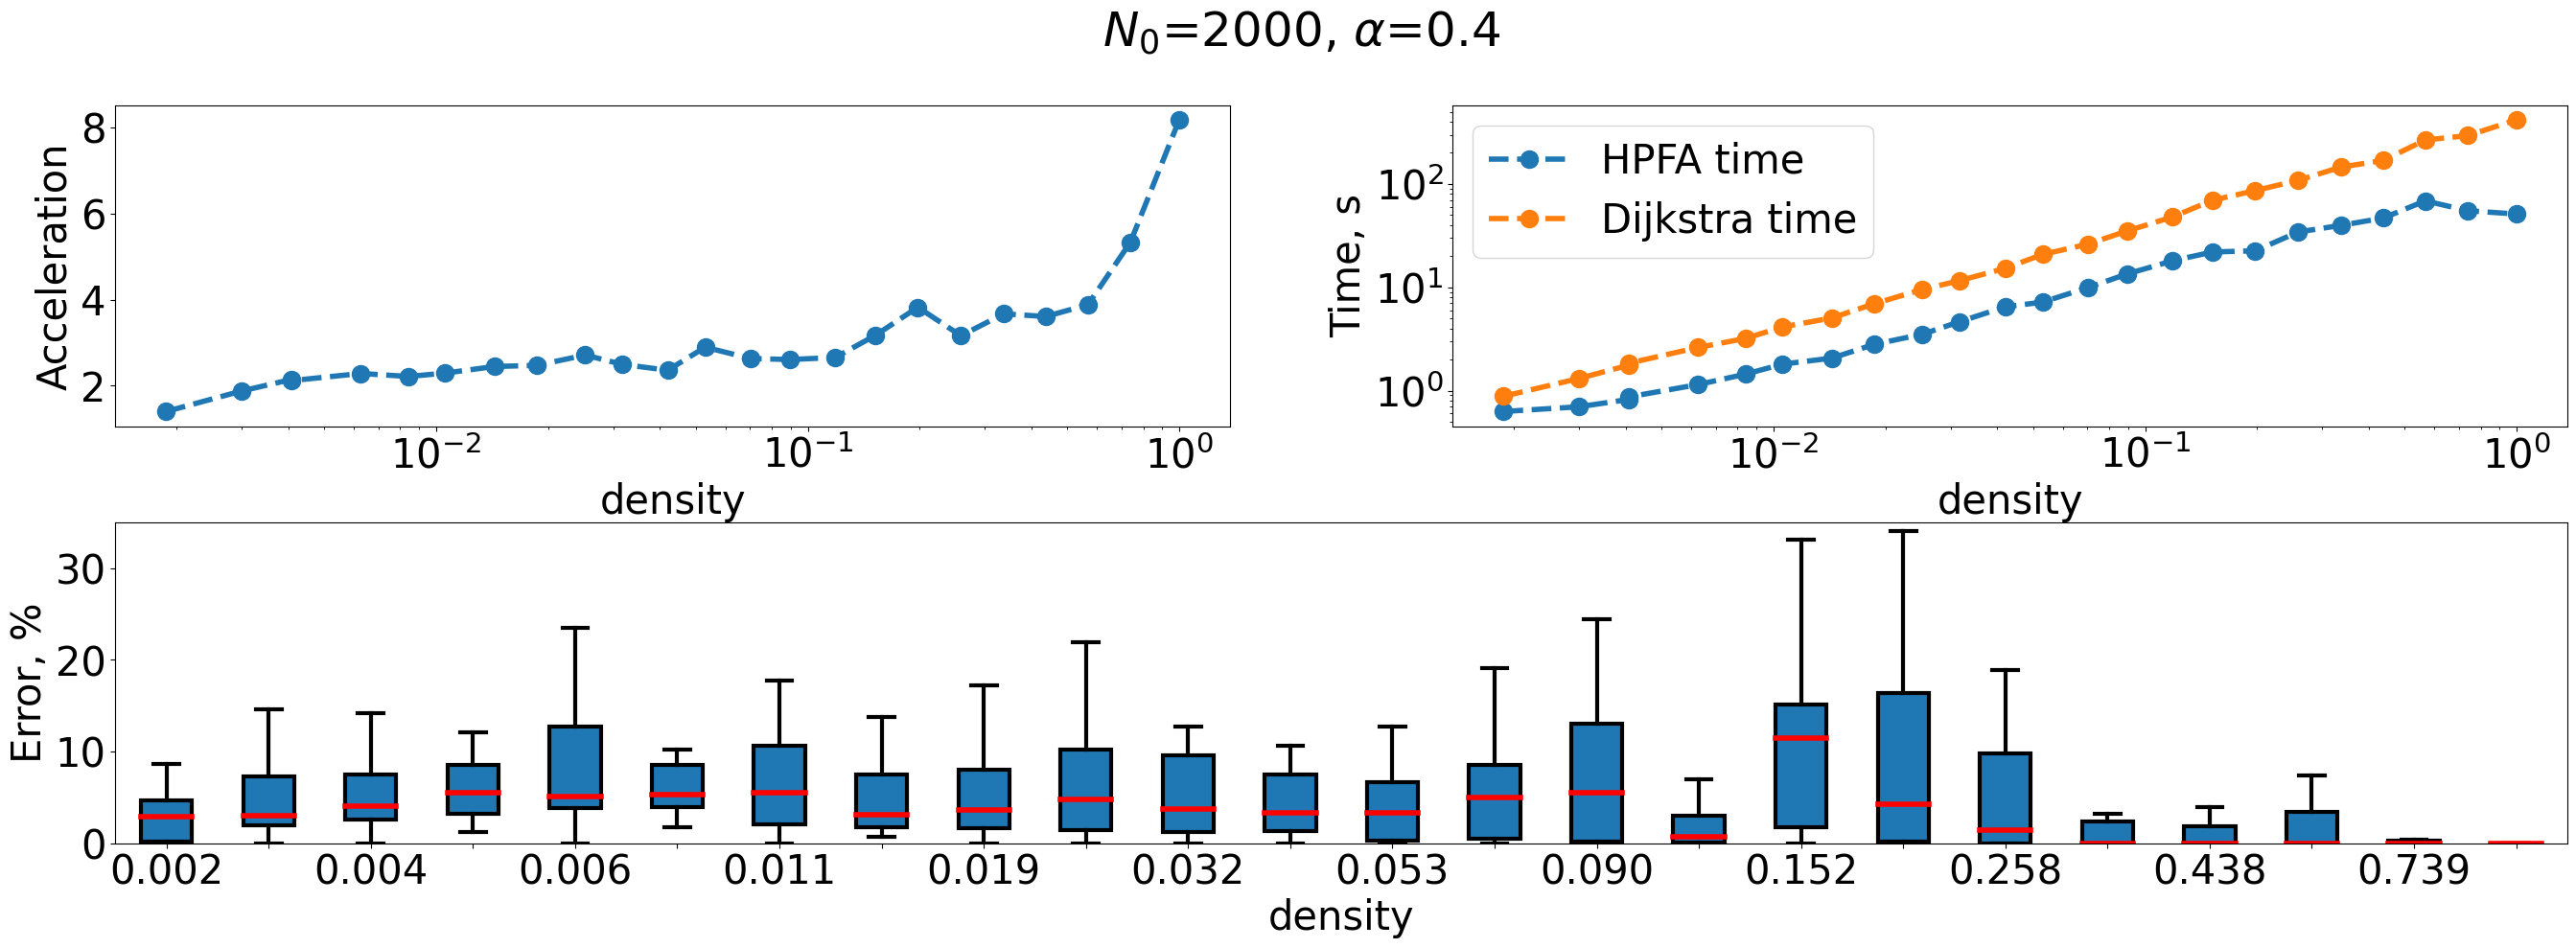

In [249]:

fig = plt.figure()
fig.set_figwidth(33)
fig.set_figheight(10)
N = 2000
fig.suptitle(r'$N_0$={}, $\alpha$={:.1f}'.format(folder.split('_')[0],float(folder.split('_')[3])))
gs = fig.add_gridspec(2,2,hspace=0.3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])



indx = np.argsort(X)
ax1.plot(X[indx], A[indx],linestyle='dashed',markersize = 13,alpha=1,zorder=100,marker='o',linewidth=4)
# ax1.errorbar(, fmt='--o',linewidth=4)
ax1.set(xlabel=r'density', ylabel='Acceleration')
ax1.set_xscale('log')
# ax1.set_yscale('log')


indx = np.argsort(X)
# ax2.errorbar(X[indx], USUAL_TIME[indx], fmt='',linewidth=4,markersize=10)
# ax2.errorbar(X[indx], HPFA_TIME[indx], fmt='o-', linewidth=4)
ax2.plot(X[indx], HPFA_TIME[indx],linestyle='dashed',markersize = 13,alpha=1,zorder=100,marker='o',linewidth=4, label = 'HPFA time')
ax2.plot(X[indx], USUAL_TIME[indx],linestyle='dashed',markersize = 13,alpha=1,zorder=100,marker='o',linewidth=4, label = 'Dijkstra time')
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set(xlabel=r'density', ylabel='Time, s')

M = len(X)
STEP = 1
label = []
for i in range(0,M,STEP):
    if i % 2 == 0:
        label.append('{:.3f}'.format(X[indx][i]))
    else:
        label.append('')

# print(data)
ax3.set(xlabel=r'density', ylabel='Error, %')
ax3.set_ylim([0,35])
print(ERRORS[0][0])
errs = []
for ll in indx[0:M:STEP]:
    e = []
    for i in range(len(r)):
        e.append(ERRORS[ll][i]*100)
    errs.append(e)
# data = {}
# data['density'] = []
# data['Error'] = []
# for i in range():
#     for err in errs[i]:
#         data['density'].append(X[i])
#         data['Error'].append(err)
# print(data)
# # data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
# data = pd.DataFrame.from_dict(data)
    boxprops = {"color": "black", "linewidth": 2, "facecolor": "#35478C"}
    medianprops = {"color": "r", "linewidth": 2}
    whiskerprops = {"color": "black", "linewidth": 2}
    capprops = {"color": "black", "linewidth": 2}
ax3.boxplot(errs, labels=label, showfliers=False, vert=True, patch_artist=True,medianprops=medianprops,boxprops=boxprops,whiskerprops=whiskerprops,capprops=capprops)
# sns.boxplot(errs,x=None, y = None,linewidth=5,color='dodgerblue', showcaps=False,
#     flierprops=False,
#     boxprops={"facecolor": (.3, .5, .7, .5)},
    # )
fig.patch.set_alpha(1)
plt.show()